# Importing Essential Libraries

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [26]:
df = pd.read_csv("classdata.csv",encoding='mac_roman')
df

,Timestamp,Reg No.,review,polarity,Unnamed: 4
0,2021/11/15 5:11:37 pm GMT+5:30,19BBS0202,I like it,1,NaN
1,2021/11/15 5:21:33 pm GMT+5:30,19BBS0104,I enjoyed the subject thoroughly,1,NaN
2,2021/11/15 5:21:53 pm GMT+5:30,19BBS0184,I don't understand the concepts very well it i...,0,NaN
3,2021/11/15 5:22:25 pm GMT+5:30,19BBS0076,I have found the class interesting,1,NaN
4,2021/11/15 5:22:42 pm GMT+5:30,19BBS0058,I loved the class and it was very informative.,1,NaN
...,...,...,...,...,...
58,2021/11/16 8:42:19 am GMT+5:30,19BBS0158,I loved the class and learned a lot,1,NaN
59,2021/11/16 8:42:40 am GMT+5:30,19BBS0158,I was bored and it was difficult to understand,0,NaN
60,2021/11/16 8:42:47 am GMT+5:30,19BBS0152,Very interesting class with a lot of challengi...,1,NaN
61,2021/11/16 8:44:10 am GMT+5:30,19BBBS0128,The class was interesting,1,NaN


# Cleaning the Data

In [27]:
df = df.drop(['Timestamp','Reg No.','Unnamed: 4'] , axis=1 )
df

,review,polarity
0,I like it,1
1,I enjoyed the subject thoroughly,1
2,I don't understand the concepts very well it i...,0
3,I have found the class interesting,1
4,I loved the class and it was very informative.,1
...,...,...
58,I loved the class and learned a lot,1
59,I was bored and it was difficult to understand,0
60,Very interesting class with a lot of challengi...,1
61,The class was interesting,1


In [28]:
df['review'] = df['review'].str.strip().str.lower()
df

,review,polarity
0,i like it,1
1,i enjoyed the subject thoroughly,1
2,i don't understand the concepts very well it i...,0
3,i have found the class interesting,1
4,i loved the class and it was very informative.,1
...,...,...
58,i loved the class and learned a lot,1
59,i was bored and it was difficult to understand,0
60,very interesting class with a lot of challengi...,1
61,the class was interesting,1


# Defining Training and Testing Data

In [29]:
x = df['review']
y = df['polarity']
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=20)

# print(" Training Data : ", x_train )
# print(" Training Data y : ", y_train )
# print(" Testing Data : ", x_test)
# print(" Testing Data Y : ", y_test)

# Data Normalisation

In [30]:
bow_vectorizer = CountVectorizer(stop_words='english')
x = bow_vectorizer.fit_transform(x).toarray()
x_test = bow_vectorizer.transform(x_test).toarray()

# Training Model

In [31]:
model = MultinomialNB()
model.fit(x, y)
print (model.score(x_test, y_test))

0.875


# Prediction

In [32]:
y_pred = model.predict(x_test)

# Classification Report

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.78      0.88         9

    accuracy                           0.88        16
   macro avg       0.89      0.89      0.88        16
weighted avg       0.90      0.88      0.88        16



# Confusion Matrix

<AxesSubplot:>

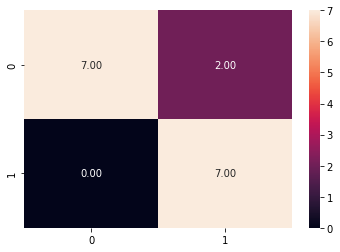

In [34]:
cm=confusion_matrix(y_test,y_pred,labels=[1,0])
sns.heatmap(cm, annot=True, fmt = '.2f')

# Individual Test Data

In [35]:
test_data_class = ["the sir is good", "the sir is bad"]
for i in test_data_class :
    print(i)
    print("Predicted Class: " + str(model.predict(bow_vectorizer.transform([i]))[0]))
    print('\n')

the sir is good
Predicted Class: 1


the sir is bad
Predicted Class: 0




# Accuracy

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy is : ",  accuracy_score(y_test, y_pred))
print("Precision is : ", precision_score(y_test, y_pred))
print("Recall Score is : ", recall_score(y_test, y_pred))

Accuracy is :  0.875
Precision is :  1.0
Recall Score is :  0.7777777777777778
